   # Описание
     
   Я собрал тут скрипты, которые я написал за последнее время для нашей базы данных. Там в основном все повторяется, разница только в виде вывода: на один планшет, в разные файлы и тд. Плюс где-то я делал через функцию, которую можно дальше использовать, где-то просто кодом. Я постарался прокоментировать первый скрипт подробно, но если что-то непонятно - обязательно спрашивай. Да и вообще спрашивай. Вообще это очень гибкий визуализатор, тут реально можно сделать почти все. Пока вроде бы ничего не надо больше, но думаю дальше понадобится
   Та часть кода в очень плохом английском - это я так коменчу в пылу работы для себя, не пугайся, лень думать на нормальном английском в такие моменты). Что бы скрипты работали, надо сначала прощелкать play  для первых нескольких ячеек. Далее все автономное
    

In [2]:
#Импорт нужных библиотек. 
import pandas as pd
import pyodbc as db
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.dates as mdates
import numpy as np
import os

In [3]:
# Ипорт базы данных в формат данных "пандас.датафрейфм",
# это 2хмерная матрица с заголовками колонок и индексами строк
conn = db.connect('Driver={Microsoft Access Driver (*.mdb, *.accdb)};DBQ=D:\\Kortunov\\transfer\\Esentuk\\REGIM.mdb;')
curs = conn.cursor()#эти штуки нужны для работы с базаой курс - это курсор, просто для перемещения по БД
for row in curs.tables(): #этот цикл пробешает по всем таблицам и пишет их имена, просто для навигации
    print(row.table_name)

MSysAccessObjects
MSysAccessXML
MSysACEs
MSysNavPaneGroupCategories
MSysNavPaneGroups
MSysNavPaneGroupToObjects
MSysNavPaneObjectIDs
MSysObjects
MSysQueries
MSysRelationships
MainTable
ВСЕ ДАННЫЕ


In [4]:
tablename = 'ВСЕ ДАННЫЕ'
df = pd.read_sql_query("SELECT * FROM [ВСЕ ДАННЫЕ];", conn)#Это sql запрос, мы запрашиваем таблицу "все данные"
# и сохраняем ее в пандас.датафйрем. Все, теперь мы можем с ней работать с помощью питона, причем с возможностью использовать силы модуля пандас
#pd.reset_option('display.max_rows', None)
pd.set_option('display.max_columns', None)#это опции визуалицации таблицы, в данном случае я прошу ее показать все колонки. 
#это я вывожу на экран датафрейм. Если в питонге пишешь просто переменную по всему, это тоже самое что команда print
curs.close()#закрываю базу данных, все, больше мы ее не используем, а используем первый датафрем где все данные хранятся для этого блокнота
conn.close()

In [5]:
df#это я вывожу на экран датафрейм. Если в питонге пишешь просто переменную по всему, это тоже самое что команда print

,Year,Month,Day,Hour,Minute,IDPN,ДАТА,CO2_общая_(грамм_в_литре),CO2_РАСТВОРЕННАЯ_(объемный_процент),CO2_РАСТВОРЕННАЯ_(см3_литре),CO2_свободная_(грамм_в_литре),N2_и_СH4_(Проценты),O2_(Проценты),pH_водородный_показатель,Pатмосф_(SOLINST)_МАКС_СУТ_(Кпа),Pатмосф_(SOLINST)_МИН_СУТ_(Кпа),Pатмосф_(SOLINST)_СРЕД_СУТ_(Кпа),Tатмосф_(SOLINST)_CРЕД_СУТ_(Градус_С),Tатмосф_(SOLINST)_МАКС_СУТ_(Градус_С),Tатмосф_(SOLINST)_МИН_СУТ_(Градус_С),азот_N2_(объемные_проценты),азот_N2_РАСТВОРЕННЫЙ_(объемный_процент),азот_N2_РАСТВОРЕННЫЙ_(см3_литре),Альфа-радиоактивность_общая_(Бк_в_литре),алюминий_суммарно_Al_(грамм_в_литре),аммоний_NH4+_(грамм_в_литре),барий_суммарно_Ba_(грамм_в_литре),бериллий_суммарно_Be_(грамм_в_литре),Бета-радиоактивность_общая_(Бк_в_литре),бор_суммарно_B_(грамм_в_литре),борная_кислота_H3BO3_(грамм_в_литре),бромид_Br-_(грамм_в_литре),Вкус_(привкус),Газовый_фактор_(м3_в_м3),гелий_He_(объемные_проценты),гелий_He_РАСТВОРЕННЫЙ_(объемный_процент),гидрокарбонат_HCO3-_(грамм_в_литре),гидрофосфат_HPO4--_(грамм_в_литре),Давление_(ЕЗМВ)_P1_устье_(кг_на_см2),Дебит_(м3_в_сут),Дебит_воды_при_гф_(м3_в_сут),Дебит_газа_(м3_в_сут),Динамический_уровень_от_ТЗ_замер_техника_(метры),Динамический_уровень_от_точки_замера_(метры),Динамический_уровень_от_устья_(метры),железо_двухвалентноеFe++_(грамм_в_литре),железо_суммарно_Fe_(грамм_в_литре),железо_трехвалентное_Fe+++_(грамм_в_литре),жесткость_карбонатная_(грамм-экв_в_литре),жесткость_общая_(грамм-экв_в_литре),иодид_I-_(грамм_в_литре),кадмий_суммарно_Cd_(грамм_в_литре),Какое-то_время_(ЕЗМВ)_Tи_(час),калий_ион_K+_(грамм_в_литре),кальций-ион_Ca++_(грамм_в_литре),карбонат_CO3--_(грамм_в_литре),кислород__O2_(объемные_проценты),кислород_O2_РАСТВОРЕННЫЙ_(объемный_процент),кислород_O2_РАСТВОРЕННЫЙ_(см3_литре),кобальт_суммарно_Co_(грамм_в_литре),кремниевая_кислота_H4SiO4_(грамм_в_литре),кремний_суммарно_Si_(грамм_в_литре),литий_суммарно_Li_(грамм_в_литре),магний-ион_Mg++_(грамм_в_литре),марганец_суммарно_Mn_(грамм_в_литре),Масса_(ЕЗМВ)_M1_ГВС?_(тонн),Масса_(ЕЗМВ)_M2_UNKNOWN_(тонн),Масса_(ЕЗМВ)_M3_UNKNOWN_(тонн),медь_суммарно_Cu_(грамм_в_литре),метакремниевая_кислота_H3SiO3_(грамм_в_литре),метан_CH4_(объемные_проценты),метан_CH4_РАСТВОРЕННЫЙ_(объемный_процент),метан_CH4_РАСТВОРЕННЫЙ_(см3_литре),минерализация_(грамм_в_литре),молибден_суммарно_Mo_(грамм_в_литре),мышьяк_суммарно_As_(грамм_в_литре),Напор_(SOLINST)_МАКС_СУТ_(метры),Напор_(SOLINST)_МИН_СУТ_(метры),Напор_(SOLINST)_СРЕД_СУТ_(метры),Напор_(ГИДЭК)_МАКС_СУТ_(метры),Напор_(ГИДЭК)_МИН_СУТ_(метры),Напор_(ГИДЭК)_СРЕД_СУТ_(метры),натрий-ион_Na+_(грамм_в_литре),никель_суммарно_Ni_(грамм_в_литре),нитрат_NO3-_(грамм_в_литре),нитрит_NO2-_(грамм_в_литре),Общая_газонасыщенность_(м3_в_м3),Общая_газонасыщенность_НТД_(м3_в_м3),Объем_(ЕЗМВ)_V1_ГВС_ГЛАВНЫЙ_(метр_куб),Объем_(ЕЗМВ)_V2_UNKNOWN_(метр_куб),Объем_(ЕЗМВ)_V3_UNKNOWN_(метр_куб),окисляемость_перманганатная_(мг_О2_в_литре),"Опер__дин__уровень,_КОНТРОЛЬ_ВЗУ_(метры)","Опер__пьез__уровень,_КОНТРОЛЬ_ВЗУ_(метры)",Осадок,полифосфаты_(грамм_в_литре),Прозрачность_качественная,радий_суммарно_Ra_(грамм_в_литре),Растворенная_СО2_(грамм_в_литре),Растворенная_СО2_(дм3_в_дм3),ртуть_суммарно_Hg_(грамм_в_литре),свинец_суммарно_Pb_(грамм_в_литре),Свободная_СО2_(Проценты),селен_суммарно_Se_(грамм_в_литре),сероводород_общий_H2S_(грамм_в_литре),сероводород_свободный_H2S_(грамм_в_литре),Статический_уровень_от_точки_замера_(метры),Статический_уровень_от_устья_скважины_(метры),стронций_суммарно_Sr_(грамм_в_литре),сульфат_SO4--_(грамм_в_литре),Сумма_АНИОНОВ_(грамм_в_литре),Сумма_КАТИОНОВ_(грамм_в_литре),сумма_катионов_Na+_и_K+_(грамм_в_литре),сурьма_суммарно_Sb_(грамм_в_литре),сухой_остаток_экспериментальный_(грамм_в_литре),Температура_(SOLINST)_МАКС_СУТ_(Градус_С),Температура_(SOLINST)_МИН_СУТ_(Градус_С),Температура_(SOLINST)_СРЕД_СУТ_(Градус_С),Температура_(Градус_С),Температура_воды_(Градус_С),Температура_воды_замер_машиниста_(Градус_С),Температура_динамическая_(Градус_С),Температура_при_отборе_пробы_(Градус_С),Температура_статическая_(

Код, который выводит и сохраняет на отдельные картинки графики всех *ненулевых* рядов относительно даты

**Внимание**: тут и вслед скрипте так сделано, что графики сохраняются в папки, но не выводятся в блокноте. Для примера того, как графики выводятся прям тут в блокнот смотри следующие скрипты

In [ ]:
params = { # Кое какие параметры рисунка, вообще тут можно оч много параметров прописать. 
       'axes.labelsize': 30,
       'font.size': 15,
       'font.sans-serif': 'Arial',
       'legend.fontsize': 29,
       'xtick.labelsize': 29,
       'ytick.labelsize': 29,
       'xtick.direction': 'out',
       'ytick.direction': 'out',
       'text.usetex': False,
       'figure.figsize': [60/2.54, 23/2.54],
       'mathtext.default': 'regular',
       'axes.facecolor': 'white',

    
       
       }
rcParams.update(params)
wellnumbers =  pd.unique(df['IDPN'])#в переменную wellnumbers  записываем все уникальные номера скважин
#columnames = ['Напор_(SOLINST)_СРЕД_СУТ_(метры)','Дебит_(м3_в_сут)','CO2_общая_(грамм_в_литре)','CO2_РАСТВОРЕННАЯ_(объемный_процент)','CO2_свободная_(грамм_в_литре)','pH_водородный_показатель','борная_кислота_H3BO3_(грамм_в_литре)','бор_суммарно_B_(грамм_в_литре)','Газовый_фактор_(м3_в_м3)','гидрокарбонат_HCO3-_(грамм_в_литре)','Давление_(ЕЗМВ)_P1_устье_(кг_на_см2)','Дебит_газа_(м3_в_сут)','Динамический_уровень_от_ТЗ_замер_техника_(метры)','Динамический_уровень_от_точки_замера_(метры)','железо_двухвалентноеFe++_(грамм_в_литре)','железо_суммарно_Fe_(грамм_в_литре)','железо_трехвалентное_Fe+++_(грамм_в_литре)','жесткость_карбонатная_(грамм-экв_в_литре)','жесткость_общая_(грамм-экв_в_литре)','иодид_I-_(грамм_в_литре)','карбонат_CO3--_(грамм_в_литре)','кальций-ион_Ca++_(грамм_в_литре)','Напор_(ГИДЭК)_СРЕД_СУТ_(метры)','Общая_газонасыщенность_(м3_в_м3)']
columnames1 = list(df.columns)# в переменную колумнейм1 записываем все имена колонок в таблице
columnames = columnames1[7:]# в переменную колумнейм записываем все имена колонок в таблице начиня с 7й (до 7й там дата)
def Create_Figures():#инициализируем функцию, так проще потом в будующем будет визуализировать
    for a in range(0,len(wellnumbers)):#Перебираем все скважины
        print(a)# это для контроля я вывожу номера цикла и номера скважины, что бы просто понимать что происходит пока код считает
        print(wellnumbers[a])
        well = df[df['IDPN'] == wellnumbers[a]]#делаем отдельный датафрейм для каждой скважины какждый круг цикла, что бы не испортить коренной датафрейм
        for b in range(0,len(columnames)):#теперь перебираем каждую колонку в текущей скважине
            countnulls = well[columnames[b]].count()#считаем сколько ненулевых значений в нашей текущей колонке (переменная неправильно названа)
            if countnulls > 0:# Если есть хоть одно значение(это можно и менять естсетсвенно) значит строим график
#                well = df[df['IDPN'] == wellnumbers[a]]
                fig, ax= plt.subplots()#это инициализация рисунка
                #scatter graph дает точечный график. Первые два значения через запятую это икс и игрек. Потом всякие параметры, прозрачность, размер цвет и тд. Лейбл используется в легенде
                lns1 = ax.scatter(well['ДАТА'], well[columnames[b]], s = 250, alpha = 0.7, color = "maroon", label = str(columnames[b]))
                #secondary axis
    #             ax1 = ax.twinx() Это использовалось для воода второй оси
    #             #bar rate graph, он использовался для построения дебита, когда я строил для двух осей
    #             lns2 = ax1.bar(x=well['ДАТА'], height =well['Дебит_(м3_в_сут)'], width = 1, alpha = 0.7, color = "royalblue",label = 'Дебит')
    #             #legend setup wow it works Легенда так заебисто сделана потому что для графика bar draph и скаттера одновременно нормальным путем легенда не делалась, что-то там не совпадает
                myl=[lns1]#в данном случае это не нужно, можно просто написать ax.legend, но уж как есть.
                labs=[l.get_label() for l in myl]
    #            ax.legend(myl, labs, frameon=False,mode = "expend",ncol=2, bbox_to_anchor=(0.85,0.97))#, loc="lower left")
                #dates format for x axis
                ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))#формат оси даты, есть много вариантов, например %Y это 4х значный год, а %y - двузначный год
                ax.xaxis_date()# мы сообщаем что нижняя ось это даты (формат данных для дат часто и не только тут работает не оч, поэтому типа отдельно сообщаем. Но насколько я помню, тут и без этого все работает)
                ax.set_xlim(2019.8*365, 2020.3*365)#устанавливаем ограничемние по нижней оси, тут я поленился, не сделал нормально, поэтому это ограничение в днях. В данном случае примерно от начала наших работ
                #это немного расширяет оси по вертикали, ограничение считает по макс+5% и мин-5%, что бы точки не упирались в потолок и пол. Не оч хорорший вариант, но для одного графика на оси работает норм. Я все думаю сделать что-то поумнее но пока нет времени
                ax.set_ylim(well[columnames[b]].min()-5*well[columnames[b]].min()/100,well[columnames[b]].max()+5*well[columnames[b]].max()/100) ##ads heads constrains, with 10% over the top to have some space for data
                ax.annotate('Скважина №' + str(wellnumbers[a]) + '  Колонка: '+str(columnames[b]),
                            xy=(0.5, .97), xycoords='figure fraction',
                            horizontalalignment='center', verticalalignment='top',
                            fontsize=30, color = 'black') #Этот кусок добавляет аннотацию - в данном случа он берет название скважины и название колонки и пишет их вверху каждого графика

                ax.set_ylabel(str(columnames[b]), color = "maroon")#Название оси(в цвет данных)
    #            ax1.set_ylabel('Дебит, $м^3/сутки$', color = "royalblue")
                ax.tick_params('y', colors= "maroon")#формат чисел на осях (в цвет данных), так же там есть много опций
    #            ax1.tick_params('y', colors= "royalblue")
                ax.grid(axis = 'both')#активиззирую сетку
                fig.tight_layout()#эта штука тут не нужна, она бывает нужна, когдда много графиков на одной картинке, но пусть будет
                directory = 'D:\\WORK\\MSU\\Esentuk\\figures\\wells\\shorttime'+str(wellnumbers[a]) #делаю переменную дериктория, где прописываю нужный путь и добавляю номер скважины. То есть для каждой скважины своя папка создается
                filename = '\\'+str(wellnumbers[a])+'_'+str(columnames[b])#делаю переменную для имени файла, который собирается из номера скважины и названия колонки
                fullpath = directory + filename#соединяю адрес дериктории и имя файла в полный нужный мне путь
                if not os.path.exists(directory):
                    os.makedirs(directory)#Проверяю есть ли такая папка, если нет - то создаю
                keepcharacters = (' ','.','_',')','(','\\',':')# эти две строчки нужны для того, что бы из названия файла убрать все символы, которые не могут использоваться в названии файла (там у некоторых колонок есть знако вопроса в названии, этот кусок кода этот знако вопроса убирает).
                fullpath2 = "".join(c for c in fullpath if c.isalnum() or c in keepcharacters).rstrip()
                plt.savefig(fullpath2,dpi=300,transparent=True)#,bbox_inches = 'tight',pad_inches = 0)#,transparent=True)# сохраняю фигуру, много тоже опций, все расписаны на сайте матплотлиба
                plt.close()#Закрываю картинку и все удаляю
                fig.clf
Create_Figures()#вызов функции

Код того планшета, который АА порпросил собрать в первую очередь, который я самый последний рассылал. Там примерно тоже самое, но руками собрано 4 разных графика на один планшет

0
97


AttributeError: 'list' object has no attribute 'get_label'

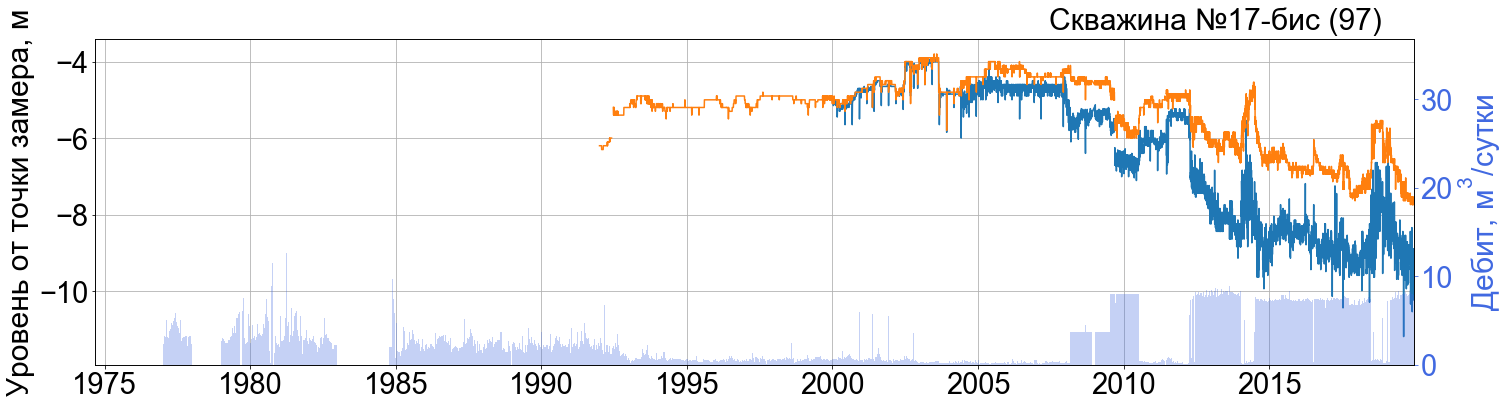

In [8]:
#graphs for individual wells
wellnumbers = [97,246,110,251,111,112,141,140,106,99,114,116,109,147,117,118,122,102]# list of ints #[pd.unique(df['IDPN'])]
wellnames = ["17-бис", "39-бис", "418'","418-бис","1-Э","2-Э","55","1-КМВ-бис","57-РЭ", "36","360","23(23-н)","59-РЭ","45-а","389","1-НВ","21-н","39"] # list of strings
columnames = ['Напор_(ГИДЭК)_СРЕД_СУТ_(метры)','Напор_(SOLINST)_СРЕД_СУТ_(метры)','Температура_(SOLINST)_СРЕД_СУТ_(Градус_С)','Температура_(Градус_С)','Температура_воды_(Градус_С)','Температура_динамическая_(Градус_С)','Температура_статическая_(Градус_С)','Газовый_фактор_(м3_в_м3)','борная_кислота_H3BO3_(грамм_в_литре)','минерализация_(грамм_в_литре)','CO2_свободная_(грамм_в_литре)','CO2_общая_(грамм_в_литре)','CO2_РАСТВОРЕННАЯ_(см3_литре)','Динамический_уровень_от_точки_замера_(метры)','Дебит_(м3_в_сут)','Статический_уровень_от_точки_замера_(метры)']#list of strings ,'CO2_общая_(грамм_в_литре)','CO2_РАСТВОРЕННАЯ_(объемный_процент)','CO2_свободная_(грамм_в_литре)','pH_водородный_показатель','борная_кислота_H3BO3_(грамм_в_литре)','бор_суммарно_B_(грамм_в_литре)','Газовый_фактор_(м3_в_м3)','гидрокарбонат_HCO3-_(грамм_в_литре)','Давление_(ЕЗМВ)_P1_устье_(кг_на_см2)','Дебит_газа_(м3_в_сут)','Динамический_уровень_от_ТЗ_замер_техника_(метры)','Динамический_уровень_от_точки_замера_(метры)','железо_двухвалентноеFe++_(грамм_в_литре)','железо_суммарно_Fe_(грамм_в_литре)','железо_трехвалентное_Fe+++_(грамм_в_литре)','жесткость_карбонатная_(грамм-экв_в_литре)','жесткость_общая_(грамм-экв_в_литре)','иодид_I-_(грамм_в_литре)','карбонат_CO3--_(грамм_в_литре)','кальций-ион_Ca++_(грамм_в_литре)','Напор_(ГИДЭК)_СРЕД_СУТ_(метры)','Общая_газонасыщенность_(м3_в_м3)']
params = {
       'axes.labelsize': 30,
       'font.size': 15,
       'font.sans-serif': 'Arial',
       'legend.fontsize': 29,
       'xtick.labelsize': 29,
       'ytick.labelsize': 29,
       'xtick.direction': 'out',
       'ytick.direction': 'out',
       'text.usetex': False,
       'figure.figsize': [60/2.54, 70/2.54],
       'mathtext.default': 'regular',
       'axes.facecolor': 'white',
       }
rcParams.update(params)
def Create_Figure_for_single_well():
    for a in range(0,len(wellnumbers)):
        print(a)
        print(wellnumbers[a])
        well = df[df['IDPN'] == wellnumbers[a]]
        fig = plt.figure()
        ax = fig.add_subplot(4,1,1)# Тут примерно все тоже самое, только я создаю рисунок а на нем говорю, чтро будет 4 сабплота и в данном случае вызываю 1. 4 это количество, 1 это адрес по горищонтали, 1 это адрес по вертикали
        #scatter graph
        lns1 = ax.scatter(well['ДАТА'], well['Динамический_уровень_от_точки_замера_(метры)'], s = 50, alpha = 0.6, color = "maroon",label = 'Динамический уровень от т. замера',linewidth='0')
        lns2= ax.scatter(well['ДАТА'], well['Статический_уровень_от_точки_замера_(метры)'], s = 50, alpha = 0.5, color = "forestgreen",label = 'Статический уровень от т. замера',linewidth='0')
        
        #secondary axis for second data, well rate in this case
        ax1 = ax.twinx()#Инициализация второй оси. Вообще можно делать бесконечное количество осей
        #bar rate graph
        lns3 = ax1.bar(x=well['ДАТА'], height =well['Дебит_(м3_в_сут)'], width = 1, alpha = 0.3, color = "royalblue",label = 'Дебит')
        ax.set_xlim(1975*365, 2020.3*365)#adds date constrains (in days in this case)
#        ax.set_xlim(2019.8*365, 2020.3*365)#adds date constrains (in days in this case)
#        ax.set_ylim(well['Динамический_уровень_от_точки_замера_(метры)'].min()-5*well['Динамический_уровень_от_точки_замера_(метры)'].min()/100,well['Статический_уровень_от_точки_замера_(метры)'].max()+5*well['Статический_уровень_от_точки_замера_(метры)'].max()/100) ##ads heads constrains, with 10% over the top to have some space for data
        ax.annotate('Скважина №'+ str(wellnames[a])+ ' ('+str(wellnumbers[a])+')',
                xy=(0.85, 1.1), xycoords='axes fraction',
                horizontalalignment='center', verticalalignment='top',
                fontsize=30, color = 'black') #here goes the annotation of well number and well name in the top right of every subplot
        
#        ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
        ax.xaxis_date()
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#       ax.set_ylim(0,)
        ax1.set_ylabel('Дебит, $м^3/сутки$', color = "royalblue")
        ax.set_ylabel('Уровень от точки замера, м', color = "Black")
        ax.tick_params('y', colors= "black")
        ax1.tick_params('y', colors= "royalblue")
        ax.grid(axis = 'both')#adds grid
        myl=[lns1]+[lns2]+[lns3]
        labs=[l.get_label() for l in myl]# this is some shit i will never understand Легенда в данном случае работает только так, потому что скаттер и бар почему-то не хотят легенду совмещать.
        ax.legend(myl, labs, frameon=False,mode = "expend",ncol=2, bbox_to_anchor=(0.005,0.96), loc="lower left")

        #####################################################################################################################
        ax2 = fig.add_subplot(4,1,2)# Инизиализируем второй сабпрот, 2 - позиция сабпрота по вертикали
        #scatter graph
        ax3 = ax2.twinx()
#        ax4 = ax2.twinx()
        lns1 = ax2.scatter(well['ДАТА'], well['CO2_общая_(грамм_в_литре)'], s = 100, alpha = 0.6, color = "crimson",label = '$CO_2$ общая, г/л)',linewidth='0')
        lns2= ax2.scatter(well['ДАТА'], well['CO2_свободная_(грамм_в_литре)'], s = 100, alpha = 1, color = "xkcd:asparagus",label = '$CO_2$ свободная, г/л',linewidth='0')
#        lns4= ax4.scatter(well['ДАТА'], well['CO2_РАСТВОРЕННАЯ_(см3_литре)'], s = 50, alpha = 0.5, color = "forestgreen",label = '$CO_2$ расстворенная, $см^3/л$',linewidth='0')
        #secondary axis for second data, well rate in this case
              
        #bar rate graph
        lns3 = ax3.scatter(well['ДАТА'], well['минерализация_(грамм_в_литре)'], s = 150, alpha = 0.8, color = "tab:pink",label = 'Минерализация, мг/л',linewidth='0')
        ax2.set_xlim(1975*365, 2020.3*365)#adds date constrains (in days in this case)
#        ax.set_xlim(2019.8*365, 2020.3*365)#adds date constrains (in days in this case)
#        ax.set_ylim(well['Динамический_уровень_от_точки_замера_(метры)'].min()-5*well['Динамический_уровень_от_точки_замера_(метры)'].min()/100,well['Статический_уровень_от_точки_замера_(метры)'].max()+5*well['Статический_уровень_от_точки_замера_(метры)'].max()/100) ##ads heads constrains, with 10% over the top to have some space for data
    #        ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
        ax2.xaxis_date()
        ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#       ax.set_ylim(0,)
        ax3.set_ylabel('Минерализация', color = "tab:pink")
        ax2.set_ylabel('$CO_2$', color = "Black")
        ax2.tick_params('y', colors= "black")
        ax3.tick_params('y', colors= "tab:pink")
        ax2.grid(axis = 'both')#adds grid
        myl=[lns1]+[lns2]+[lns3]#+[lns4]
        labs=[l.get_label() for l in myl]# this is some shit i will never understand
        ax2.legend(myl, labs, frameon=False,mode = "expend",ncol=2, bbox_to_anchor=(0.005,0.96), loc="lower left")
 ###############################################################################################################################       
        #'Газовый_фактор_(м3_в_м3)','борная_кислота_H3BO3_(грамм_в_литре)
        ax4 = fig.add_subplot(4,1,3)
        #scatter graph
        ax5 = ax4.twinx()
#        ax4 = ax2.twinx()
        lns1 = ax4.scatter(well['ДАТА'], well['Газовый_фактор_(м3_в_м3)'], s = 100, alpha = 1, color = "tab:orange",label = 'Газовый фактор, $м^3/м^3$',linewidth='0')
#        lns2= ax2.scatter(well['ДАТА'], well['CO2_свободная_(грамм_в_литре)'], s = 100, alpha = 1, color = "xkcd:asparagus",label = '$CO_2$ свободная, г/л',linewidth='0')
#        lns4= ax4.scatter(well['ДАТА'], well['CO2_РАСТВОРЕННАЯ_(см3_литре)'], s = 50, alpha = 0.5, color = "forestgreen",label = '$CO_2$ расстворенная, $см^3/л$',linewidth='0')
        #secondary axis for second data, well rate in this case
              
        #bar rate graph
        lns3 = ax5.scatter(well['ДАТА'], well['борная_кислота_H3BO3_(грамм_в_литре)'], s = 150, alpha = 0.8, color = "tab:purple",label = 'Борная кислота, г/л',linewidth='0')
        ax4.set_xlim(1975*365, 2020.3*365)#adds date constrains (in days in this case)
#        ax.set_xlim(2019.8*365, 2020.3*365)#adds date constrains (in days in this case)
#        ax.set_ylim(well['Динамический_уровень_от_точки_замера_(метры)'].min()-5*well['Динамический_уровень_от_точки_замера_(метры)'].min()/100,well['Статический_уровень_от_точки_замера_(метры)'].max()+5*well['Статический_уровень_от_точки_замера_(метры)'].max()/100) ##ads heads constrains, with 10% over the top to have some space for data
    #        ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
        ax4.xaxis_date()
        ax4.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#       ax.set_ylim(0,)
        ax4.set_ylabel('Газовый фактор, $м^3/м^3$', color = "tab:orange")
        ax5.set_ylabel('Борная кислота, г/л', color = "tab:purple")
        ax4.tick_params('y', colors= "tab:orange")
        ax5.tick_params('y', colors= "tab:purple")
        ax4.grid(axis = 'both')#adds grid
        myl=[lns1]+[lns3]#+[lns4]
        labs=[l.get_label() for l in myl]# this is some shit i will never understand
        ax4.legend(myl, labs, frameon=False,mode = "expend",ncol=2, bbox_to_anchor=(0.005,0.96), loc="lower left")        
              
# #####################################################################################################################################        
        #'Температура_(SOLINST)_СРЕД_СУТ_(Градус_С)','Температура_(Градус_С)',
        #'Температура_воды_(Градус_С)','Температура_динамическая_(Градус_С)','Температура_статическая_(Градус_С)'
        ax6 = fig.add_subplot(4,1,4)
        #scatter graph
#        ax6 = ax5.twinx()
#        ax4 = ax2.twinx()
#ВАЖНОВАЖНОВАЖНОВАЖНОВАЖНОВАЖНОВАЖНОВАЖНОВАЖНОВАЖНОВАЖНОВАЖНОВАЖНОВАЖНОВАЖНОВАЖНОВАЖНОВАЖНОВАЖНОВАЖНОВАЖНОВАЖНОВАЖНОВАЖНОВАЖНОВАЖНОВАЖНОВАЖНОВАЖНОВАЖНОВАЖНОВАЖНОВАЖНОВАЖНОВАЖНОВАЖНОВАЖНОВАЖНОВАЖНОВАЖНОВАЖНОВАЖНОВАЖНОВАЖНОВАЖНО
#Тут вместо скаттера использован график plot, это самый простой график для линий, но его можно сделать и точечным ('o' - это формат маркера, в данном случае - жирная точка. Например "-" - это линия).
#Для этих конкретных данных, именно для температуры, почему-то scatter баговал, связано видимо с тем, что они пустые. 
#пока я решил эту проблему так, вроде не особо плохо. Но потом можно будет подразобраться и сделать почеловечески. К сожадению этот баг встречается, поэтому придется это все переписать со временем для автоматизации
#Но при этот эти же данные в таком же виде отлично без проблем ровно так же построились на предыдущем скрипте. Не понял пока почему так
        lns1 = ax6.plot(well['ДАТА'], well['Температура_(Градус_С)'],'o', alpha = 1, color = "tab:orange",label = 'Температура, $^\circ$C',markersize=14)
        lns2 = ax6.plot(well['ДАТА'], well['Температура_(SOLINST)_СРЕД_СУТ_(Градус_С)'],'o',  alpha = 0.8, color = "lightcoral",label = 'Температура Solinst, $^\circ$C',markersize=14)
        lns3 = ax6.plot(well['ДАТА'], well['Температура_воды_(Градус_С)'],'o',  alpha = 0.8, color = "limegreen",label = 'Температура воды, $^\circ$C',markersize=14)
        lns4 = ax6.plot(well['ДАТА'], well['Температура_динамическая_(Градус_С)'],'o',  alpha = 0.8, color = "dodgerblue",label = 'Температура динамическая, $^\circ$C',markersize=14)
        lns5 = ax6.plot(well['ДАТА'], well['Температура_(SOLINST)_СРЕД_СУТ_(Градус_С)'],'o' ,alpha = 0.8, color = "mediumvioletred",label = 'Температура статическая, $^\circ$C',markersize=14)
#        lns2= ax2.scatter(well['ДАТА'], well['CO2_свободная_(грамм_в_литре)'], s = 100, alpha = 1, color = "xkcd:asparagus",label = '$CO_2$ свободная, г/л',linewidth='0')
#        lns4= ax4.scatter(well['ДАТА'], well['CO2_РАСТВОРЕННАЯ_(см3_литре)'], s = 50, alpha = 0.5, color = "forestgreen",label = '$CO_2$ расстворенная, $см^3/л$',linewidth='0')
        #secondary axis for second data, well rate in this case
              
        #bar rate graph
  
        ax6.set_xlim(1975*365, 2020.3*365)#adds date constrains (in days in this case)
#        ax.set_xlim(2019.8*365, 2020.3*365)#adds date constrains (in days in this case)
#        ax.set_ylim(well['Динамический_уровень_от_точки_замера_(метры)'].min()-5*well['Динамический_уровень_от_точки_замера_(метры)'].min()/100,well['Статический_уровень_от_точки_замера_(метры)'].max()+5*well['Статический_уровень_от_точки_замера_(метры)'].max()/100) ##ads heads constrains, with 10% over the top to have some space for data
    #        ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
        ax6.xaxis_date()
        ax6.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#       ax.set_ylim(0,)
        ax6.set_ylabel('Температура, $^\circ$C', color = "black")

        ax6.tick_params('y', colors= "black")
 
        ax6.grid(axis = 'both')#adds grid
#        myl=[lns1]#+[lns3]+[lns4]+[lns2]+[lns5]
#        labs=[l.get_label() for l in myl]# this is some shit i will never understand
        ax6.legend(frameon=False,mode = "expend",ncol=3, bbox_to_anchor=(0.005,0.96), loc="lower left")          
        ax6.set_xlabel('Дата, года', color = "black")
#####################################################################################################################################       
        fig.tight_layout()
        fig.set_facecolor('white')# тут я решил сделать белый фон, а не прозрачный как в прошлом скрипте
        directory = 'D:\\WORK\\MSU\\Esentuk\\figures\\wells\\singlewell_wholetime'
        filename = '\\'+str(wellnames[a])+'_wholetime.jpg'# и рисунок поменял на джипег
        fullpath = directory + filename
        if not os.path.exists(directory):
            os.makedirs(directory)
        keepcharacters = (' ','.','_',')','(','\\',':')
        fullpath2 = "".join(c for c in fullpath if c.isalnum() or c in keepcharacters).rstrip()
        plt.savefig(fullpath2,dpi=300,facecolor='w',bbox_inches = 'tight',pad_inches = 0)#,transparent=True)
        plt.close()
        fig.clf
Create_Figure_for_single_well()

Дальше идут коды не особо закоментированные, можешь просто нажать посомтреть что вылезет, в целом там все тоже самое, но они зато показывают результат прям в блокноте

0
246
1
110
2
251
3
111
4
112
5
141
6
140


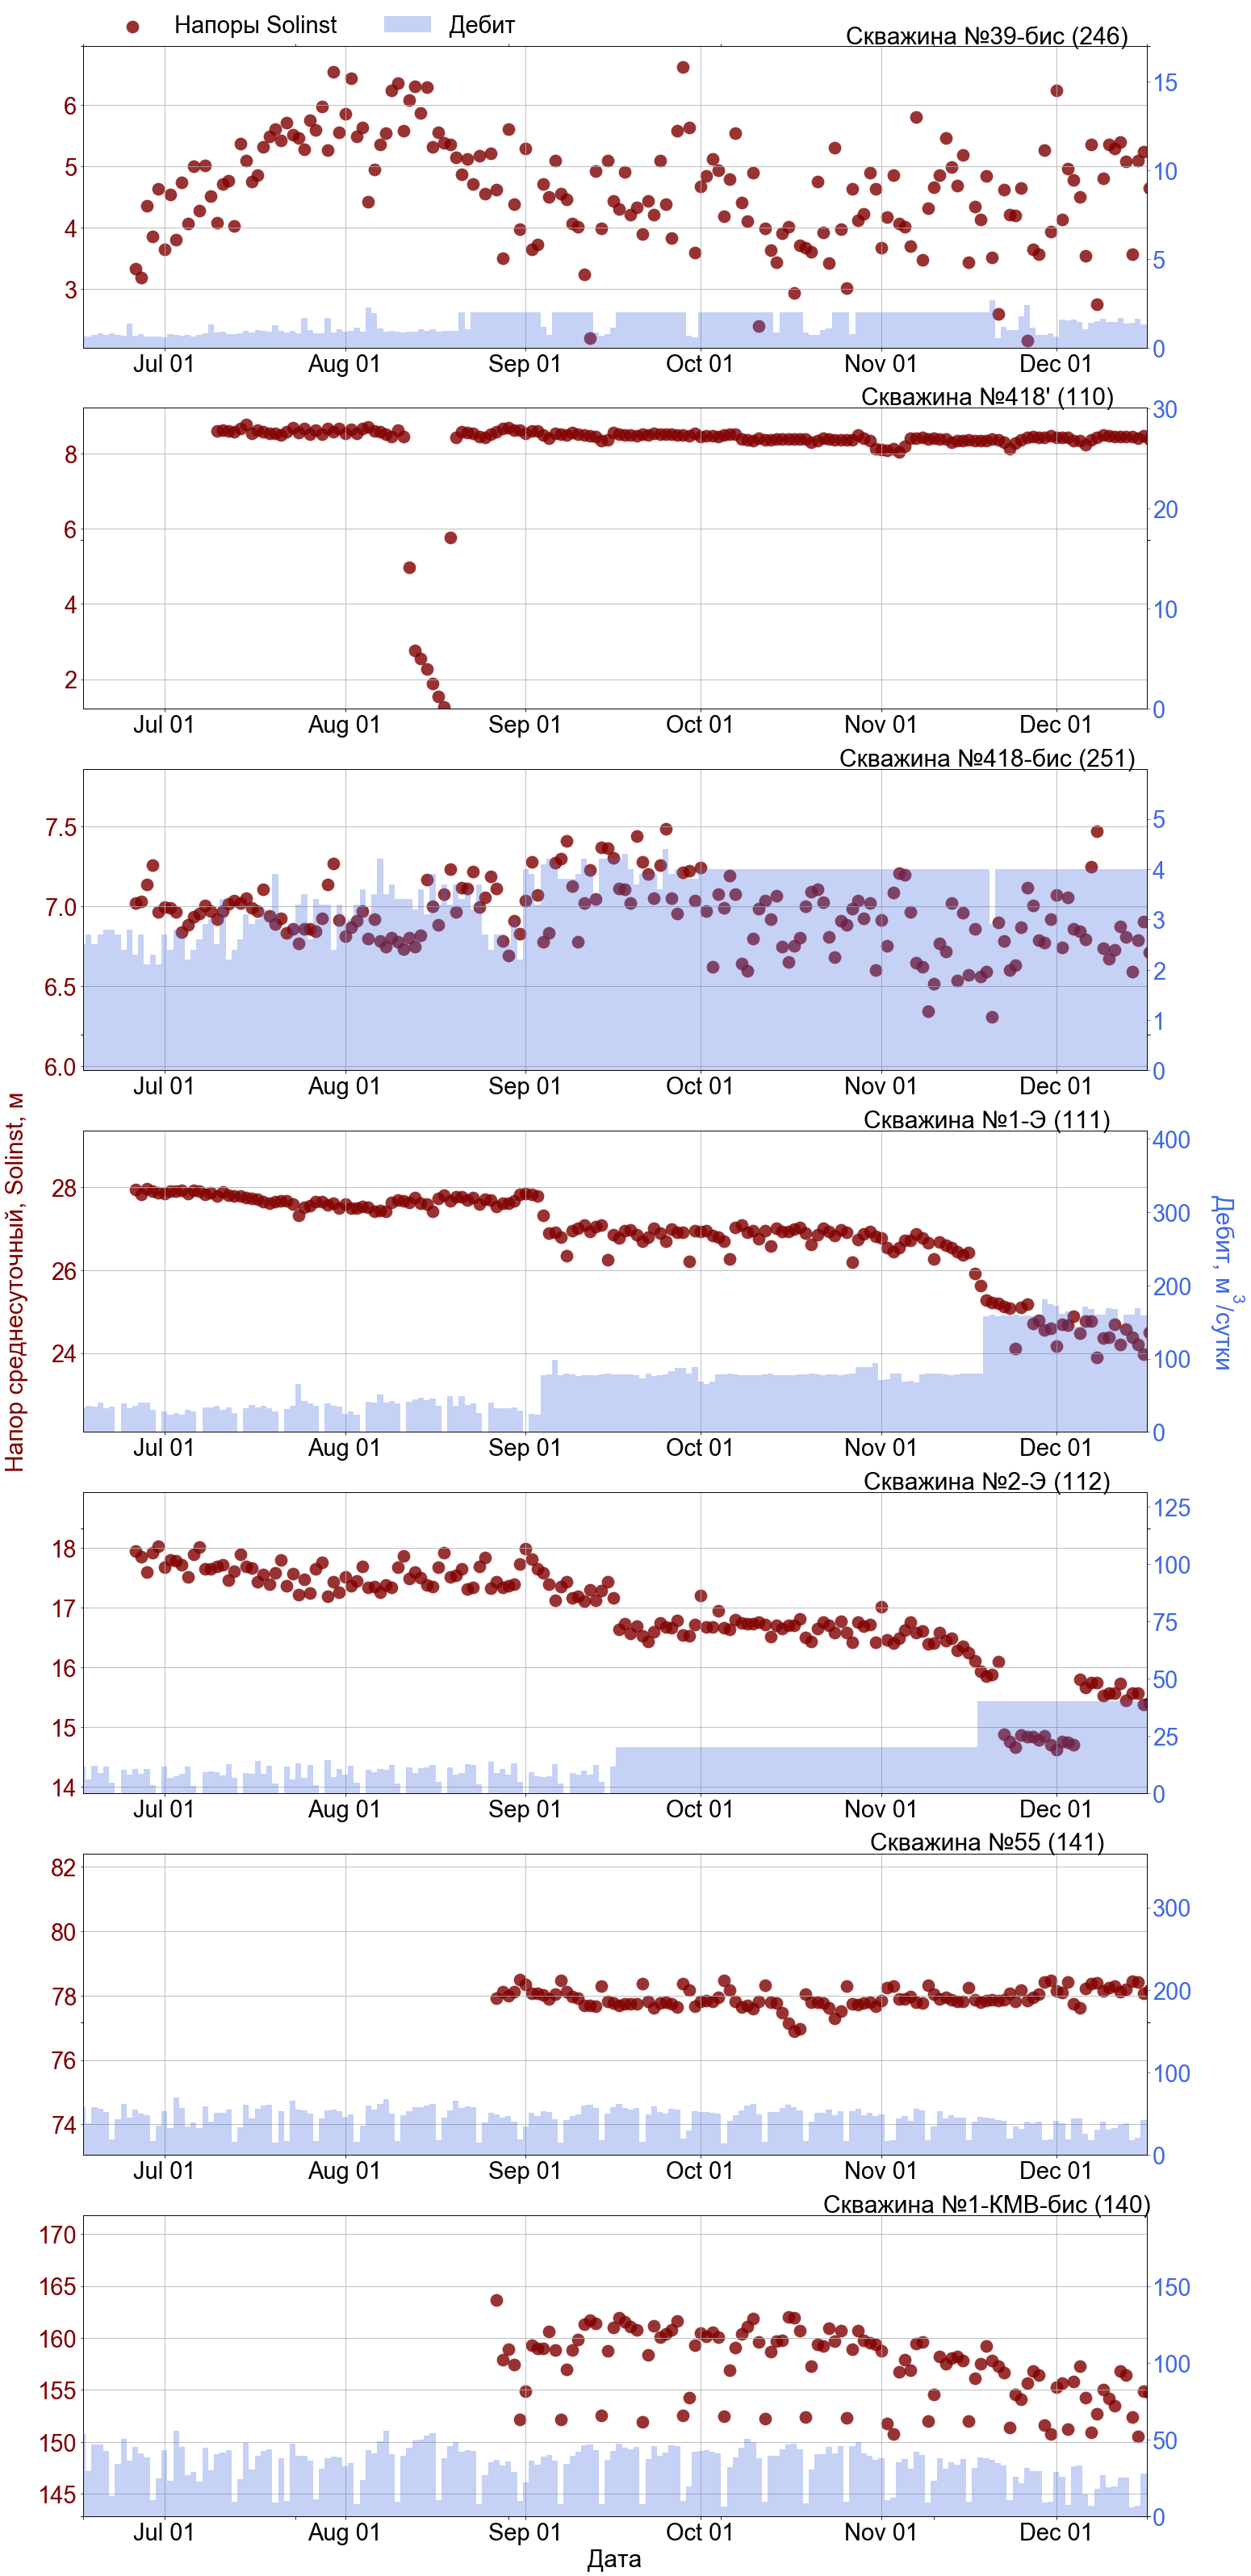

In [7]:
#fig.clf()
wellnumbers = [246,110,251,111,112,141,140] #well names in database
wellnames = ["39-бис", "418'","418-бис","1-Э","2-Э","55","1-КМВ-бис" ] #well names in reality, from excel files
params = {
       'axes.labelsize': 30,
       'font.size': 15,
       'font.sans-serif': 'Arial',
       'legend.fontsize': 29,
       'xtick.labelsize': 29,
       'ytick.labelsize': 29,
       'xtick.direction': 'out',
       'ytick.direction': 'out',
       'text.usetex': False,
       'figure.figsize': [60/2.54, (len(wellnumbers)*20+3)/2.54],
       'mathtext.default': 'regular',
       'axes.facecolor': 'white',
       }
rcParams.update(params)
fig = plt.figure() #figure
# here goes a loop which produce a subfigure for every well placing it in the individual subplot within the figure. 
for a in range(0,len(wellnumbers)): # the loop will take the number from wellnumbers and use it to fish data in the dataframe
    ax = fig.add_subplot(len(wellnumbers),1,a+1) #the number of sublots equals the length of wellnumber. Probably wrong way to introduce subplot - inside the loop
    print(a)
    print(wellnumbers[a])
    well = df[df['IDPN'] == wellnumbers[a]] #here we slice the mother dataframe into the "well" dataframe there only data for a perticular well is stored. 
    #scatter graph for well heads
    lns1 = ax.scatter(well['ДАТА'], well['Напор_(SOLINST)_СРЕД_СУТ_(метры)'], s = 250, alpha = 0.8, color = "maroon", label = 'Напоры Solinst',linewidth='0')
    #secondary axis for second data, well rate in this case
    ax1 = ax.twinx()
    #bar rate graph
    lns2 = ax1.bar(x=well['ДАТА'], height =well['Дебит_(м3_в_сут)'], width = 1, alpha = 0.3, color = "royalblue",label = 'Дебит')
    ax.set_xlim(2019.8*365, 2020.3*365)#adds date constrains (in days in this case)
    #ax.set_ylim(8, 8.8)
    ax.set_ylim(well['Напор_(SOLINST)_СРЕД_СУТ_(метры)'].min()-5*well['Напор_(SOLINST)_СРЕД_СУТ_(метры)'].min()/100,well['Напор_(SOLINST)_СРЕД_СУТ_(метры)'].max()+5*well['Напор_(SOLINST)_СРЕД_СУТ_(метры)'].max()/100) ##ads heads constrains, with 10% over the top to have some space for data
    ax.annotate('Скважина №'+ str(wellnames[a])+ ' ('+str(wellnumbers[a])+')',
                xy=(0.85, 1.07), xycoords='axes fraction',
                horizontalalignment='center', verticalalignment='top',
                fontsize=30, color = 'black') #here goes the annotation of well number and well name in the top right of every subplot
#   ax.set_ylabel('Напор среднесуточный, Solinst, м ', color = "maroon")
    ax1.set_ylabel('Дебит, $м^3/сутки$', color = "none")
    ax.tick_params('y', colors= "maroon")
    ax1.tick_params('y', colors= "royalblue")
    ax.grid(axis = 'both')#adds grid
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))# date fromat for date (oct 01 for instance)
    if a == 0:# for 1st (0) subplot the legend is also added
        #legend setup wow it works
        myl=[lns1]+[lns2]
        labs=[l.get_label() for l in myl]# this is some shit i will never understand
        ax.legend(myl, labs, frameon=False,mode = "expend",ncol=2, bbox_to_anchor=(0.005,0.96), loc="lower left")
    if a == len(wellnumbers)-1:#for last subplot the label is added for x axes
#         ax.set_xticklabels([])
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
        ax.xaxis_date() 
#         ax.set_ylabel('Напор среднесуточный, Solinst, м ', color = "maroon")
#         ax1.set_ylabel('Дебит, $м^3/сутки$', color = "royalblue")
        ax.set_xlabel('Дата')
#         ytickPositions = [10,20,30]
#         ax.set_yticks(ytickPositions)
# To display a common y-axis label,  we create a large axis that covers all the subplots
ax0 = fig.add_subplot(111, frameon=False, autoscale_on=False)
ax3 = ax0.twinx()
# Hide tick and tick label of the big axss
############################################################################################
ax0.tick_params(labelcolor='none', top='false', bottom='false', left='false', right='false')
ax3.tick_params(labelcolor='none', top='false', bottom='false', left='false', right='false')
ax0.spines['top'].set_color('none')
ax0.spines['bottom'].set_color('none')
ax0.spines['left'].set_color('none')
ax0.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['right'].set_color('none')
ax0.set_ylabel("Напор среднесуточный, Solinst, м", labelpad = 20, color= "maroon")
ax3.set_ylabel("Дебит, $м^3/сутки$", labelpad = 20, color= "royalblue", rotation = 270)
ax3.yaxis.labelpad = 75
ax0.yaxis.labelpad = 20
############################################################################################
#plt.savefig('E:\\WORK\\MSU\\Esentuky\\figures\\wells\\explt_wells'+ '_solinst_and_rate.png',dpi=300,transparent=True,bbox_inches = 'tight',pad_inches = 0)

In [ ]:
wellnumbers = [246,110,251,111,112,141,140]
columnames = ['Напор_(SOLINST)_СРЕД_СУТ_(метры)','Дебит_(м3_в_сут)']
def Create_Figures():
    for a in range(0,len(wellnumbers)):
    #a = 0
        print(a)
        print(wellnumbers[a])
        for b in range(0,len(columnames)):
            print(b)
            print(columnames[b])
            well = df[df['IDPN'] == wellnumbers[a]]
            fig, ax= plt.subplots()
            #scatter graph
            lns1 = ax.scatter(well['ДАТА'], well[columnames[b]], s = 250, alpha = 0.7, color = "maroon", label = str(columnames[b]))
            #secondary axis
#             ax1 = ax.twinx()
#             #bar rate graph
#             lns2 = ax1.bar(x=well['ДАТА'], height =well['Дебит_(м3_в_сут)'], width = 1, alpha = 0.7, color = "royalblue",label = 'Дебит')
#             #legend setup wow it works
            myl=[lns1]
            labs=[l.get_label() for l in myl]
#            ax.legend(myl, labs, frameon=False,mode = "expend",ncol=2, bbox_to_anchor=(0.85,0.97))#, loc="lower left")
            #dates format for x axis
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
            ax.xaxis_date()
            ax.set_xlim(2019.8*365, 2020.3*365)
            ax.set_ylim(well[columnames[b]].min()-5*well[columnames[b]].min()/100,well[columnames[b]].max()+5*well[columnames[b]].max()/100) ##ads heads constrains, with 10% over the top to have some space for data
            #ax.set_ylim(8, 8.8)
#            ax.set_ylim(0,)
            ax.annotate('Скважина №' + str(wellnumbers[a]) + '  Колонка: '+str(columnames[b]),
                        xy=(0.5, .97), xycoords='figure fraction',
                        horizontalalignment='center', verticalalignment='top',
                        fontsize=30, color = 'black')
                        
            ax.set_ylabel(str(columnames[b]), color = "maroon")
#            ax1.set_ylabel('Дебит, $м^3/сутки$', color = "royalblue")
            ax.tick_params('y', colors= "maroon")
#            ax1.tick_params('y', colors= "royalblue")
            ax.grid(axis = 'both')
            fig.tight_layout()
            directory = 'D:\\WORK\\MSU\\Esentuk\\figures\\wells\\'+str(wellnumbers[a])
            if not os.path.exists(directory):
                os.makedirs(directory)
            plt.savefig(directory +'\\'+str(wellnumbers[a])+'_'+str(columnames[b]),dpi=300,transparent=True)#,bbox_inches = 'tight',pad_inches = 0)#,transparent=True)
            fig.clf
Create_Figures()

Код для сравнения всех замеров уровней

In [5]:
df

,Year,Month,Day,Hour,Minute,IDPN,ДАТА,CO2_общая_(грамм_в_литре),CO2_РАСТВОРЕННАЯ_(объемный_процент),CO2_РАСТВОРЕННАЯ_(см3_литре),CO2_свободная_(грамм_в_литре),N2_и_СH4_(Проценты),O2_(Проценты),pH_водородный_показатель,Pатмосф_(SOLINST)_МАКС_СУТ_(Кпа),Pатмосф_(SOLINST)_МИН_СУТ_(Кпа),Pатмосф_(SOLINST)_СРЕД_СУТ_(Кпа),Tатмосф_(SOLINST)_CРЕД_СУТ_(Градус_С),Tатмосф_(SOLINST)_МАКС_СУТ_(Градус_С),Tатмосф_(SOLINST)_МИН_СУТ_(Градус_С),азот_N2_(объемные_проценты),азот_N2_РАСТВОРЕННЫЙ_(объемный_процент),азот_N2_РАСТВОРЕННЫЙ_(см3_литре),Альфа-радиоактивность_общая_(Бк_в_литре),алюминий_суммарно_Al_(грамм_в_литре),аммоний_NH4+_(грамм_в_литре),барий_суммарно_Ba_(грамм_в_литре),бериллий_суммарно_Be_(грамм_в_литре),Бета-радиоактивность_общая_(Бк_в_литре),бор_суммарно_B_(грамм_в_литре),борная_кислота_H3BO3_(грамм_в_литре),бромид_Br-_(грамм_в_литре),Вкус_(привкус),Газовый_фактор_(м3_в_м3),гелий_He_(объемные_проценты),гелий_He_РАСТВОРЕННЫЙ_(объемный_процент),гидрокарбонат_HCO3-_(грамм_в_литре),гидрофосфат_HPO4--_(грамм_в_литре),Давление_(ЕЗМВ)_P1_устье_(кг_на_см2),Дебит_(м3_в_сут),Дебит_воды_при_гф_(м3_в_сут),Дебит_газа_(м3_в_сут),Динамический_уровень_от_ТЗ_замер_техника_(метры),Динамический_уровень_от_точки_замера_(метры),Динамический_уровень_от_устья_(метры),железо_двухвалентноеFe++_(грамм_в_литре),железо_суммарно_Fe_(грамм_в_литре),железо_трехвалентное_Fe+++_(грамм_в_литре),жесткость_карбонатная_(грамм-экв_в_литре),жесткость_общая_(грамм-экв_в_литре),иодид_I-_(грамм_в_литре),кадмий_суммарно_Cd_(грамм_в_литре),Какое-то_время_(ЕЗМВ)_Tи_(час),калий_ион_K+_(грамм_в_литре),кальций-ион_Ca++_(грамм_в_литре),карбонат_CO3--_(грамм_в_литре),кислород__O2_(объемные_проценты),кислород_O2_РАСТВОРЕННЫЙ_(объемный_процент),кислород_O2_РАСТВОРЕННЫЙ_(см3_литре),кобальт_суммарно_Co_(грамм_в_литре),кремниевая_кислота_H4SiO4_(грамм_в_литре),кремний_суммарно_Si_(грамм_в_литре),литий_суммарно_Li_(грамм_в_литре),магний-ион_Mg++_(грамм_в_литре),марганец_суммарно_Mn_(грамм_в_литре),Масса_(ЕЗМВ)_M1_ГВС?_(тонн),Масса_(ЕЗМВ)_M2_UNKNOWN_(тонн),Масса_(ЕЗМВ)_M3_UNKNOWN_(тонн),медь_суммарно_Cu_(грамм_в_литре),метакремниевая_кислота_H3SiO3_(грамм_в_литре),метан_CH4_(объемные_проценты),метан_CH4_РАСТВОРЕННЫЙ_(объемный_процент),метан_CH4_РАСТВОРЕННЫЙ_(см3_литре),минерализация_(грамм_в_литре),молибден_суммарно_Mo_(грамм_в_литре),мышьяк_суммарно_As_(грамм_в_литре),Напор_(SOLINST)_МАКС_СУТ_(метры),Напор_(SOLINST)_МИН_СУТ_(метры),Напор_(SOLINST)_СРЕД_СУТ_(метры),Напор_(ГИДЭК)_МАКС_СУТ_(метры),Напор_(ГИДЭК)_МИН_СУТ_(метры),Напор_(ГИДЭК)_СРЕД_СУТ_(метры),натрий-ион_Na+_(грамм_в_литре),никель_суммарно_Ni_(грамм_в_литре),нитрат_NO3-_(грамм_в_литре),нитрит_NO2-_(грамм_в_литре),Общая_газонасыщенность_(м3_в_м3),Общая_газонасыщенность_НТД_(м3_в_м3),Объем_(ЕЗМВ)_V1_ГВС_ГЛАВНЫЙ_(метр_куб),Объем_(ЕЗМВ)_V2_UNKNOWN_(метр_куб),Объем_(ЕЗМВ)_V3_UNKNOWN_(метр_куб),окисляемость_перманганатная_(мг_О2_в_литре),"Опер__дин__уровень,_КОНТРОЛЬ_ВЗУ_(метры)","Опер__пьез__уровень,_КОНТРОЛЬ_ВЗУ_(метры)",Осадок,полифосфаты_(грамм_в_литре),Прозрачность_качественная,радий_суммарно_Ra_(грамм_в_литре),Растворенная_СО2_(грамм_в_литре),Растворенная_СО2_(дм3_в_дм3),ртуть_суммарно_Hg_(грамм_в_литре),свинец_суммарно_Pb_(грамм_в_литре),Свободная_СО2_(Проценты),селен_суммарно_Se_(грамм_в_литре),сероводород_общий_H2S_(грамм_в_литре),сероводород_свободный_H2S_(грамм_в_литре),Статический_уровень_от_точки_замера_(метры),Статический_уровень_от_устья_скважины_(метры),стронций_суммарно_Sr_(грамм_в_литре),сульфат_SO4--_(грамм_в_литре),Сумма_АНИОНОВ_(грамм_в_литре),Сумма_КАТИОНОВ_(грамм_в_литре),сумма_катионов_Na+_и_K+_(грамм_в_литре),сурьма_суммарно_Sb_(грамм_в_литре),сухой_остаток_экспериментальный_(грамм_в_литре),Температура_(SOLINST)_МАКС_СУТ_(Градус_С),Температура_(SOLINST)_МИН_СУТ_(Градус_С),Температура_(SOLINST)_СРЕД_СУТ_(Градус_С),Температура_(Градус_С),Температура_воды_(Градус_С),Температура_воды_замер_машиниста_(Градус_С),Температура_динамическая_(Градус_С),Температура_при_отборе_пробы_(Градус_С),Температура_статическая_(

In [22]:
params = { # Кое какие параметры рисунка, вообще тут можно оч много параметров прописать. 
       'axes.labelsize': 30,
       'font.size': 15,
       'font.sans-serif': 'Arial',
       'legend.fontsize': 29,
       'xtick.labelsize': 29,
       'ytick.labelsize': 29,
       'xtick.direction': 'out',
       'ytick.direction': 'out',
       'text.usetex': False,
       'figure.figsize': [60/2.54, 30/2.54],
       'mathtext.default': 'regular',
       'axes.facecolor': 'white',

    
       
       }
rcParams.update(params)
wellnumbers =  pd.unique(df['IDPN'])#в переменную wellnumbers  записываем все уникальные номера скважин
for a in range(0,len(wellnumbers)):#Перебираем все скважины
    print(a)# это для контроля я вывожу номера цикла и номера скважины, что бы просто понимать что происходит пока код считает
    print(wellnumbers[a])
    well = df[df['IDPN'] == wellnumbers[a]]#делаем отдельный датафрейм для каждой скважины какждый круг цикла, что бы не испортить коренной датафрейм
    
#        name = ['']
    countnulls = well['Напор_(SOLINST)_СРЕД_СУТ_(метры)'].count()#считаем сколько ненулевых значений в колонке уровней солниснст (переменная неправильно названа)
    countnulls1 = well['Напор_(ГИДЭК)_СРЕД_СУТ_(метры)'].count()#считаем сколько ненулевых значений в колонке уровней солниснст (переменная неправильно названа)
    if countnulls > 0:# Если есть хоть одно значение(это можно и менять естсетсвенно) значит строим график
        #scatter graph
        fig, ax= plt.subplots()
        lns1 = ax.plot(well['ДАТА'], well['Напор_(SOLINST)_СРЕД_СУТ_(метры)'],'o', alpha = 0.6, color = "tab:orange",label = 'Solinst mean, m',markersize=14, linewidth='0')
        lns2 = ax.plot(well['ДАТА'], well['Напор_(SOLINST)_МАКС_СУТ_(метры)'],'o',  alpha = 0.6, color = "lightcoral",label = 'Solinst max, m',markersize=14, linewidth='0')
        lns3 = ax.plot(well['ДАТА'], well['Напор_(SOLINST)_МИН_СУТ_(метры)'],'o',  alpha = 0.6, color = "limegreen",label = 'Solinst min, m',markersize=14, linewidth='0')
        name = 'Solinst'
    elif countnulls1 > 0:# Если есть хоть одно значение(это можно и менять естсетсвенно) значит строим график
        #scatter graph
        fig, ax= plt.subplots()
        lns1 = ax.plot(well['ДАТА'], well['Напор_(ГИДЭК)_СРЕД_СУТ_(метры)'],'o', alpha = 0.6, color = "tab:orange",label = 'Гидэк mean, m',markersize=14, linewidth='0')
        lns2 = ax.plot(well['ДАТА'], well['Напор_(ГИДЭК)_МАКС_СУТ_(метры)'],'o',  alpha = 0.6, color = "lightcoral",label = 'Гидэк max, m',markersize=14, linewidth='0')
        lns3 = ax.plot(well['ДАТА'], well['Напор_(ГИДЭК)_МИН_СУТ_(метры)'],'o',  alpha = 0.6, color = "limegreen",label = 'Гидэк min, m',markersize=14, linewidth='0')
        name = 'Гидэк'
    else:
        continue
    lns4 = ax.plot(well['ДАТА'], well['Опер__пьез__уровень,_КОНТРОЛЬ_ВЗУ_(метры)'],'s',  alpha = 0.6, color = "dodgerblue",label = 'Опер. пьез. уровень, м',markersize=14, linewidth='0')
    lns5 = ax.plot(well['ДАТА'], well['Опер__дин__уровень,_КОНТРОЛЬ_ВЗУ_(метры)'],'s' ,alpha = 0.6, color = "mediumvioletred",label = 'Опер. дин. уровень, м',markersize=14, linewidth='0')
    lns6 = ax.plot(well['ДАТА'], well['Динамический_уровень_от_ТЗ_замер_техника_(метры)'],'x' ,alpha = 0.6, color = "tab:cyan",label = 'Дин уровень от ТЗ, техник, м',markersize=14)
    lns7 = ax.plot(well['ДАТА'], well['Динамический_уровень_от_точки_замера_(метры)'],'+' ,alpha = 1, color = "tab:blue",label = 'Дин. уровень от ТЗ, м',markersize=14)
    lns8 = ax.plot(well['ДАТА'], well['Динамический_уровень_от_устья_(метры)'],'+' ,alpha = 1, color = "tab:gray",label = 'Дин. уровень от устья, м',markersize=14)
    lns9 = ax.plot(well['ДАТА'], well['Статический_уровень_от_точки_замера_(метры)'],'D' ,alpha = 0.6, color = "tab:brown",label = 'Стат. уровень от ТЗ м',markersize=14, linewidth='0')
    lns10 = ax.plot(well['ДАТА'], well['Статический_уровень_от_устья_скважины_(метры)'],'D' ,alpha = 0.6, color = "black",label = 'Стат. уровень от устья, м',markersize=14, linewidth='0')

    ax.set_xlim(2019.8*365, 2020.3*365)#adds date constrains (in days in this case)
    #ax.set_ylim(8, 8.8)
#        ax.set_ylim(well['Напор_(SOLINST)_СРЕД_СУТ_(метры)'].min()-5*well['Напор_(SOLINST)_СРЕД_СУТ_(метры)'].min()/100,well['Напор_(SOLINST)_СРЕД_СУТ_(метры)'].max()+5*well['Напор_(SOLINST)_СРЕД_СУТ_(метры)'].max()/100) ##ads heads constrains, with 10% over the top to have some space for data
    ax.annotate('Скважина №'+str(wellnumbers[a]),
                xy=(0.85, 1.04), xycoords='axes fraction',
                horizontalalignment='center', verticalalignment='top',
                fontsize=30, color = 'black') #here goes the annotation of well number and well name in the top right of every subplot
#   ax.set_ylabel('Напор среднесуточный, Solinst, м ', color = "maroon")
    ax.tick_params('y', colors= "black")
    ax.set_ylabel('Уровни, м ', color = "black")
    ax.grid(axis = 'both')#adds grid
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))# date fromat for date (oct 01 for instance)
    #legend setup wow it works
#    myl=[lns1]+[lns2]
#    labs=[l.get_label() for l in myl]# this is some shit i will never understand
    ax.legend(frameon=False,mode = "expend",ncol=3, bbox_to_anchor=(0.005,0.96), loc="lower left")

    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    ax.xaxis_date() 
    ax.set_xlabel('Дата')
    ########################################
    #fig.tight_layout()
    fig.set_facecolor('white')# тут я решил сделать белый фон, а не прозрачный как в прошлом скрипте
    directory = 'D:\\Kortunov\\transfer\\Esentuk\\figures\\wells\\singlewell_all_heads_'+name
    filename = '\\'+str(wellnumbers[a])+'_singlewell_all_heads.jpg'# и рисунок поменял на джипег
    fullpath = directory + filename
    if not os.path.exists(directory):
        os.makedirs(directory)
    keepcharacters = (' ','.','_',')','(','\\',':')
    fullpath2 = "".join(c for c in fullpath if c.isalnum() or c in keepcharacters).rstrip()
    plt.savefig(fullpath2,dpi=300,facecolor='w',bbox_inches = 'tight',pad_inches = 0)#,transparent=True)
    plt.close()
    fig.clf


0
127
1
97
2
100
3
101
4
140
5
141
6
246
7
111
8
112
9
115
10
117
11
121
12
124
13
128
14
129
15
131
16
135
17
348
18
349
19
104
20
105
21
106
22
107
23
114
24
116
25
109
26
119
27
118
28
132
29
143
30
144
31
243
32
99
33
102
34
103
35
146
36
148
37
149
38
269
39
113
40
120
41
122
42
123
43
242
44
108
45
136
46
125
47
133
48
110
49
249
50
247
51
126
52
130
53
134
54
137
55
138
56
345
57
343
58
344
59
351
60
245
61
232
62
250
63
308
64
307
65
287
66
285
67
147
68
98
69
350
70
346
71
347
72
252
73
253
74
353
75
354
76
352
77
10071
78
6001
79
6002
80
10070
81
355
82
342
83
251
84
12098535
85
11071


In [60]:
df['Динамический_уровень_от_ТЗ_замер_техника_(метры)'].count()

2590

In [49]:
wellnumbers =  pd.unique(df['IDPN'])#в переменную wellnumbers  записываем все уникальные номера скважин
#columnames = ['Напор_(SOLINST)_СРЕД_СУТ_(метры)','Дебит_(м3_в_сут)','CO2_общая_(грамм_в_литре)','CO2_РАСТВОРЕННАЯ_(объемный_процент)','CO2_свободная_(грамм_в_литре)','pH_водородный_показатель','борная_кислота_H3BO3_(грамм_в_литре)','бор_суммарно_B_(грамм_в_литре)','Газовый_фактор_(м3_в_м3)','гидрокарбонат_HCO3-_(грамм_в_литре)','Давление_(ЕЗМВ)_P1_устье_(кг_на_см2)','Дебит_газа_(м3_в_сут)','Динамический_уровень_от_ТЗ_замер_техника_(метры)','Динамический_уровень_от_точки_замера_(метры)','железо_двухвалентноеFe++_(грамм_в_литре)','железо_суммарно_Fe_(грамм_в_литре)','железо_трехвалентное_Fe+++_(грамм_в_литре)','жесткость_карбонатная_(грамм-экв_в_литре)','жесткость_общая_(грамм-экв_в_литре)','иодид_I-_(грамм_в_литре)','карбонат_CO3--_(грамм_в_литре)','кальций-ион_Ca++_(грамм_в_литре)','Напор_(ГИДЭК)_СРЕД_СУТ_(метры)','Общая_газонасыщенность_(м3_в_м3)']
columnames1 = list(df.columns)# в переменную колумнейм1 записываем все имена колонок в таблице
columnames = columnames1[7:]# в переменную колумнейм записываем все имена колонок в таблице начиня с 7й (до 7й там дата)
for b in range(0,len(columnames)):#теперь перебираем каждую колонку в текущей скважине
    countnulls = df[columnames[b]].count()#считаем сколько ненулевых значений в нашей текущей колонке (переменная неправильно названа)
    if countnulls > 0:# Если есть хоть одно значение(это можно и менять естсетсвенно) значит строим график
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.hist((df[columnames[b]]),50, color  = 'red',alpha = 0.8)   
#        ax.annotate(columnames[b],
 #               xy=(0.85, 1.07), xycoords='axes fraction',
 #               horizontalalignment='center', verticalalignment='top',
 #               fontsize=30, color = 'black') #here goes the annotation of well number and well name in the top right of every subplot
    ax.set_xlabel(columnames[b])
    ax.set_ylabel("Частота")
    directory = 'D:\\Kortunov\\transfer\\Esentuk\\figures\\wells\\histograms'
    filename = '\\'+columnames[b]+".png"# и рисунок поменял на джипег
    fullpath = directory + filename
    if not os.path.exists(directory):
        os.makedirs(directory)
    keepcharacters = (' ','.','_',')','(','\\',':')
    fullpath2 = "".join(c for c in fullpath if c.isalnum() or c in keepcharacters).rstrip()
    plt.savefig(fullpath2,dpi=300,facecolor='w',bbox_inches = 'tight',pad_inches = 0) #,transparent=True)
    plt.close()
     